In [1]:
import tokunaga_fns as toku
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Lets load some of our data and see if there is any variation in c values between the basins in this dataset

# empty list to store our c values
Cs = []

# we have 7 basins in this dataset, labelled 0 through 6
for i in range(7):
    filename = 'TokunagaData_OCR_{}.csv'.format(i)

    toku_data, strahler_data, lengths = toku.read_toku_data(filename)

    r_sq, a, c = toku.fit_a_and_c(toku_data, strahler_data)
    Cs.append(c)
    

{'whiskers': [<matplotlib.lines.Line2D at 0x12d752e80>,
 'caps': [<matplotlib.lines.Line2D at 0x12d75c550>,
 'boxes': [<matplotlib.lines.Line2D at 0x12d752d30>],
 'medians': [<matplotlib.lines.Line2D at 0x12d75cbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12d75cf28>],
 'means': []}

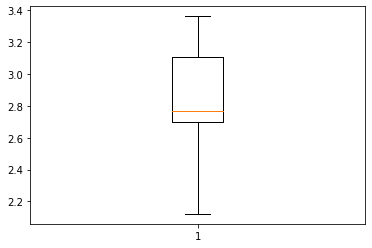

In [19]:
# Lets make a quick boxplot of our c values to see the variability in this part of the landscape
# In reality we need more than 7 values for this to be a useful metric on its own

plt.boxplot(Cs)

Text(0, 0.5, '$T_k$')

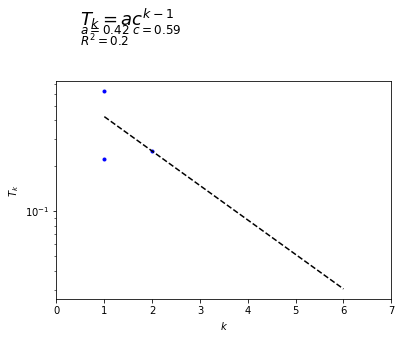

In [2]:
# Plot and style an example of the fitting process to compute the c and a values

filename = 'South/C/C2.csv'
toku_data, strahler_data, lengths = toku.read_toku_data(filename)
# is this correct as the data in the csv files is strahler, 
# tokunaga and finally lengths.
r_sq, a, c, x, y = toku.fit_a_and_c_x_y(toku_data, strahler_data)

model_x = np.linspace(1,6,100)
model_y = toku.f(model_x, a, c)

annotation1 = '$T_{k} = a c^{k-1}$'
annotation2 = '$a = ' + str(round(a, 2)) + '$ $c = ' + str(round(c, 2)) + '$'
annotation3 = '$R^2 = ' + str(round(r_sq, 2)) + '$'

plt.text(0.5, 1.70, annotation1, fontsize='18')
plt.text(0.5, 1.5, annotation2, fontsize='12')
plt.text(0.5, 1.25, annotation3, fontsize='12')

plt.xlim(0, 7)
plt.yscale('log')
plt.plot(x, y, '.b')
plt.plot(model_x, model_y, 'k--')
plt.xlabel('$k$')
plt.ylabel('$T_k$')